## Imports

In [147]:
import copy
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import torch
import torch.onnx
import torch.nn as nn
import torch.utils.data as data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [148]:
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)
torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

In [149]:
## Data mining


In [150]:
df_org = pd.read_csv('train_data.csv')
# df[['Year', 'Month', 'Day']] = df['dteday'].str.split('-', expand=True)
df_eval_org = pd.read_csv('test_data.csv')

In [151]:
df = df_org.copy()
df_eval = df_eval_org.copy()

In [152]:
df

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0
1,51327,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
2,48672,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
3,380530,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
4,78318,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,570796,2007,1928,24,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
4120,307079,2015,644,22,terraced,individual_heating,management_in_trust,102.0,400.0,0~5min,5min~10min,5.0,10.0,Daegu,7,7.0,11.0
4121,357522,2007,868,20,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
4122,312389,1978,1327,1,corridor,individual_heating,self_management,87.0,0.0,0~5min,0-5min,1.0,4.0,Kyungbuk_uni_hospital,3,7.0,11.0


In [153]:
df_eval

,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,1993,914,10,mixed,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,20.0,Myung-duk,4,14.0,17.0
1,2014,907,16,terraced,individual_heating,management_in_trust,90.0,1174.0,0~5min,0-5min,7.0,20.0,Myung-duk,9,14.0,17.0
2,2007,1629,7,terraced,individual_heating,management_in_trust,7.0,605.0,0~5min,0-5min,5.0,5.0,Banwoldang,5,9.0,5.0
3,2005,743,21,mixed,individual_heating,management_in_trust,67.0,798.0,0~5min,5min~10min,6.0,0.0,Bangoge,7,13.0,15.0
4,2006,903,7,terraced,individual_heating,management_in_trust,123.0,181.0,5min~10min,0-5min,3.0,11.0,Myung-duk,4,8.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,2006,2056,2,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
1763,2007,1394,7,terraced,individual_heating,management_in_trust,554.0,524.0,0~5min,0-5min,5.0,10.0,Banwoldang,4,9.0,8.0
1764,1993,644,20,mixed,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,20.0,Myung-duk,4,14.0,17.0
1765,2008,914,11,terraced,individual_heating,management_in_trust,197.0,475.0,5min~10min,0-5min,6.0,14.0,Sin-nam,8,7.0,9.0


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4124 entries, 0 to 4123
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SalePrice                  4124 non-null   int64  
 1   YearBuilt                  4124 non-null   int64  
 2   Size(sqf)                  4124 non-null   int64  
 3   Floor                      4124 non-null   int64  
 4   HallwayType                4124 non-null   object 
 5   HeatingType                4124 non-null   object 
 6   AptManageType              4124 non-null   object 
 7   N_Parkinglot(Ground)       4124 non-null   float64
 8   N_Parkinglot(Basement)     4124 non-null   float64
 9   TimeToBusStop              4124 non-null   object 
 10  TimeToSubway               4124 non-null   object 
 11  N_manager                  4124 non-null   float64
 12  N_elevators                4124 non-null   float64
 13  SubwayStation              4124 non-null   objec

In [155]:
new_col = df['SalePrice'].apply(lambda x: 2 if (x > 300_000) else
                                        1 if (x > 100_000) else
                                        0)
df.insert(1, 'PriceCategory', new_col)
df

,SalePrice,PriceCategory,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,1,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0
1,51327,0,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
2,48672,0,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
3,380530,2,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
4,78318,0,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,570796,2,2007,1928,24,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
4120,307079,2,2015,644,22,terraced,individual_heating,management_in_trust,102.0,400.0,0~5min,5min~10min,5.0,10.0,Daegu,7,7.0,11.0
4121,357522,2,2007,868,20,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
4122,312389,2,1978,1327,1,corridor,individual_heating,self_management,87.0,0.0,0~5min,0-5min,1.0,4.0,Kyungbuk_uni_hospital,3,7.0,11.0


In [156]:
numerical_columns = ["YearBuilt", "Size(sqf)", "Floor", "N_Parkinglot(Ground)", "N_Parkinglot(Basement)", "N_manager", "N_elevators", "N_FacilitiesInApt", "N_FacilitiesNearBy(Total)", "N_SchoolNearBy(Total)"]

In [157]:
categorical_columns = ["HallwayType", "HeatingType", "AptManageType", "TimeToBusStop", "TimeToSubway", "SubwayStation"]

In [158]:
one_hot = pd.get_dummies(df[categorical_columns])
one_hot_eval = pd.get_dummies(df_eval[categorical_columns])

In [159]:
df.drop(columns=categorical_columns, inplace=True)
df_eval.drop(columns=categorical_columns, inplace=True)


In [160]:
df_train = df.sample(frac=0.8,random_state=200) #random state is a seed value
df_test = df.drop(df_train.index)

cat_train = one_hot.sample(frac=0.8,random_state=200) #random state is a seed value
cat_test = one_hot.drop(cat_train.index)

numerical_data = torch.from_numpy(df_train.values[:, 2:]).float()
categorical_data = torch.from_numpy(cat_train.values).float()
targets = torch.from_numpy(df_train.values[:, 1]).float()

test_numerical_data = torch.from_numpy(df_test.values[:, 2:]).float()
test_categorical_data = torch.from_numpy(cat_test.values).float()
test_targets = torch.from_numpy(df_test.values[:, 1]).float()

eval_numerical_data = torch.from_numpy(df_eval.values).float()
eval_categorical_data = torch.from_numpy(one_hot_eval.values).float()

In [161]:
numerical_data.shape

torch.Size([3299, 10])

In [162]:
train_dataset = data.TensorDataset(numerical_data,categorical_data,targets)
test_dataset = data.TensorDataset(test_numerical_data,test_categorical_data,test_targets)
eval_dataset = data.TensorDataset(eval_numerical_data, eval_categorical_data)

In [163]:
train_data_loader = data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_data_loader = data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=True, drop_last=False)
data_loaders = {'train': train_data_loader, 'test':test_data_loader}
eval_data_loader = data.DataLoader(eval_dataset, batch_size=len(eval_dataset), shuffle=False, drop_last=False)

In [164]:
list(train_dataset[0])

[tensor([2014.,  914.,   15.,   90., 1174.,    7.,   20.,    9.,   14.,   17.]),
 tensor([0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0.]),
 tensor(2.)]

In [165]:
class ApartmentClassifier(nn.Module):

    def __init__(self, num_hidden1, num_hidden2, num_outputs):
        super().__init__()
        self.layer1 = nn.Linear(numerical_data.shape[1] + categorical_data.shape[1], num_hidden1)
        # self.bn1 = nn.BatchNorm1d(num_hidden1)
        self.act_f1 = nn.ReLU()
        self.d1 = nn.Dropout(0.01)

        self.layer2 = nn.Linear(num_hidden1, num_hidden2)
        # self.bn2 = nn.BatchNorm1d(num_hidden2)
        self.act_f2 = nn.ReLU()
        self.d2 = nn.Dropout(0.01)

        self.layer3= nn.Linear(num_hidden2, num_outputs)


    def forward(self, x, cat_x):
        x = torch.cat([x,cat_x],dim=1)
        x = self.layer1(x)
        # x = self.bn1(x)
        x = self.act_f1(x)
        x = self.d1(x)

        x = self.layer2(x)
        # x = self.bn2(x)
        x = self.act_f2(x)
        x = self.d2(x)

        x = self.layer3(x)

        return x

In [166]:
def get_correct(predictions, targets):
    correct = 0
    pred = torch.argmax(predictions, dim=1)
    correct += pred.eq(targets.view_as(pred).to(device)).sum().item()
    return correct

In [167]:


def l1_regularization(model, l1_lambda):
    sum_layer1_params = sum(abs(p).sum() for p in model.layer1.parameters())
    sum_layer2_params = sum(abs(p).sum() for p in model.layer2.parameters())
    l1_reg = l1_lambda * (sum_layer1_params + sum_layer2_params )
    return l1_reg


In [168]:

def train_model(model, data_loaders, loss_module, optimizer, scheduler, l1_lambda, num_epochs=100):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    history = {}
    training_loss, training_acc, test_loss, test_acc = [], [], [], []
    for epoch in range(num_epochs):
        print(f"Epoch {epoch}:")
        for phase in ['train', 'test']:
            if phase =='train':
                model.train()
            else:
                model.eval()
            running_loss = 0.0
            running_corrects = 0

            for num_inputs, cat_inputs, targets in data_loaders[phase]:
                num_inputs = num_inputs.to(device)
                cat_inputs = cat_inputs.to(device)
                targets = targets.to(device)
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    predictions = model(num_inputs, cat_inputs)
                    predictions = predictions.squeeze(dim=1)
                    loss = loss_module(predictions, targets.long())
                    # loss = loss + l1_regularization(model, l1_lambda)
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                running_loss += loss.item() * num_inputs.size(0)
                running_corrects += get_correct(predictions, targets)
            # if phase == 'train':
            #      scheduler.step()

            epoch_loss = running_loss / len(data_loaders[phase].dataset)
            epoch_acc = running_corrects / len(data_loaders[phase].dataset)
            if phase == 'train':
                training_loss.append(epoch_loss)
                training_acc.append(epoch_acc)
            else:
                test_loss.append(epoch_loss)
                test_acc.append(epoch_acc)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print(f'\nTraining complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc*100:2f} %')
    history.update({'training_loss' : training_loss, 'training_acc': training_acc, 'test_loss' : test_loss, 'test_acc' : test_acc})
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, history

In [169]:
model = ApartmentClassifier(num_hidden1=16, num_hidden2=16, num_outputs=3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
loss_module = nn.CrossEntropyLoss()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

ApartmentClassifier(
  (layer1): Linear(in_features=33, out_features=16, bias=True)
  (act_f1): ReLU()
  (d1): Dropout(p=0.01, inplace=False)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (act_f2): ReLU()
  (d2): Dropout(p=0.01, inplace=False)
  (layer3): Linear(in_features=16, out_features=3, bias=True)
)

In [170]:
_, history = train_model(model, data_loaders, loss_module, optimizer, scheduler, l1_lambda = 0.5, num_epochs=200)

Epoch 0:
train Loss: 4.4519 Acc: 0.5350
test Loss: 1.5703 Acc: 0.4170
Epoch 1:
train Loss: 1.1986 Acc: 0.6087
test Loss: 0.7144 Acc: 0.6558
Epoch 2:
train Loss: 0.8194 Acc: 0.7014
test Loss: 0.5583 Acc: 0.8097
Epoch 3:
train Loss: 0.6811 Acc: 0.7581
test Loss: 0.5640 Acc: 0.7830
Epoch 4:
train Loss: 0.6427 Acc: 0.7642
test Loss: 0.4796 Acc: 0.8194
Epoch 5:
train Loss: 0.5928 Acc: 0.7717
test Loss: 0.4631 Acc: 0.8230
Epoch 6:
train Loss: 0.5632 Acc: 0.7711
test Loss: 0.4589 Acc: 0.8000
Epoch 7:
train Loss: 0.5580 Acc: 0.7757
test Loss: 0.4616 Acc: 0.8000
Epoch 8:
train Loss: 0.5555 Acc: 0.7669
test Loss: 0.4488 Acc: 0.8170
Epoch 9:
train Loss: 0.5311 Acc: 0.7787
test Loss: 0.4383 Acc: 0.8194
Epoch 10:
train Loss: 0.5008 Acc: 0.7845
test Loss: 0.4417 Acc: 0.7939
Epoch 11:
train Loss: 0.5347 Acc: 0.7642
test Loss: 0.4440 Acc: 0.8145
Epoch 12:
train Loss: 0.5085 Acc: 0.7808
test Loss: 0.4273 Acc: 0.8255
Epoch 13:
train Loss: 0.4985 Acc: 0.7851
test Loss: 0.4349 Acc: 0.8158
Epoch 14:
train 

In [177]:
def run_eval():
    with torch.no_grad():
        num_inputs, cat_inputs = next(iter(eval_data_loader))
        predictions = model(num_inputs, cat_inputs)
        predictions = predictions.squeeze(dim=1)
        pred = torch.argmax(predictions, dim=1)

        new_df = pd.DataFrame(pred, columns=['PriceCategory'])
        # new_df = new_df['PriceCategory'].apply(lambda x: "expensive" if x == 2 else
        #                                 "average" if x == 1 else
        #                                 "cheap")

        new_df.to_csv("predykcje.csv", index=False)
run_eval()

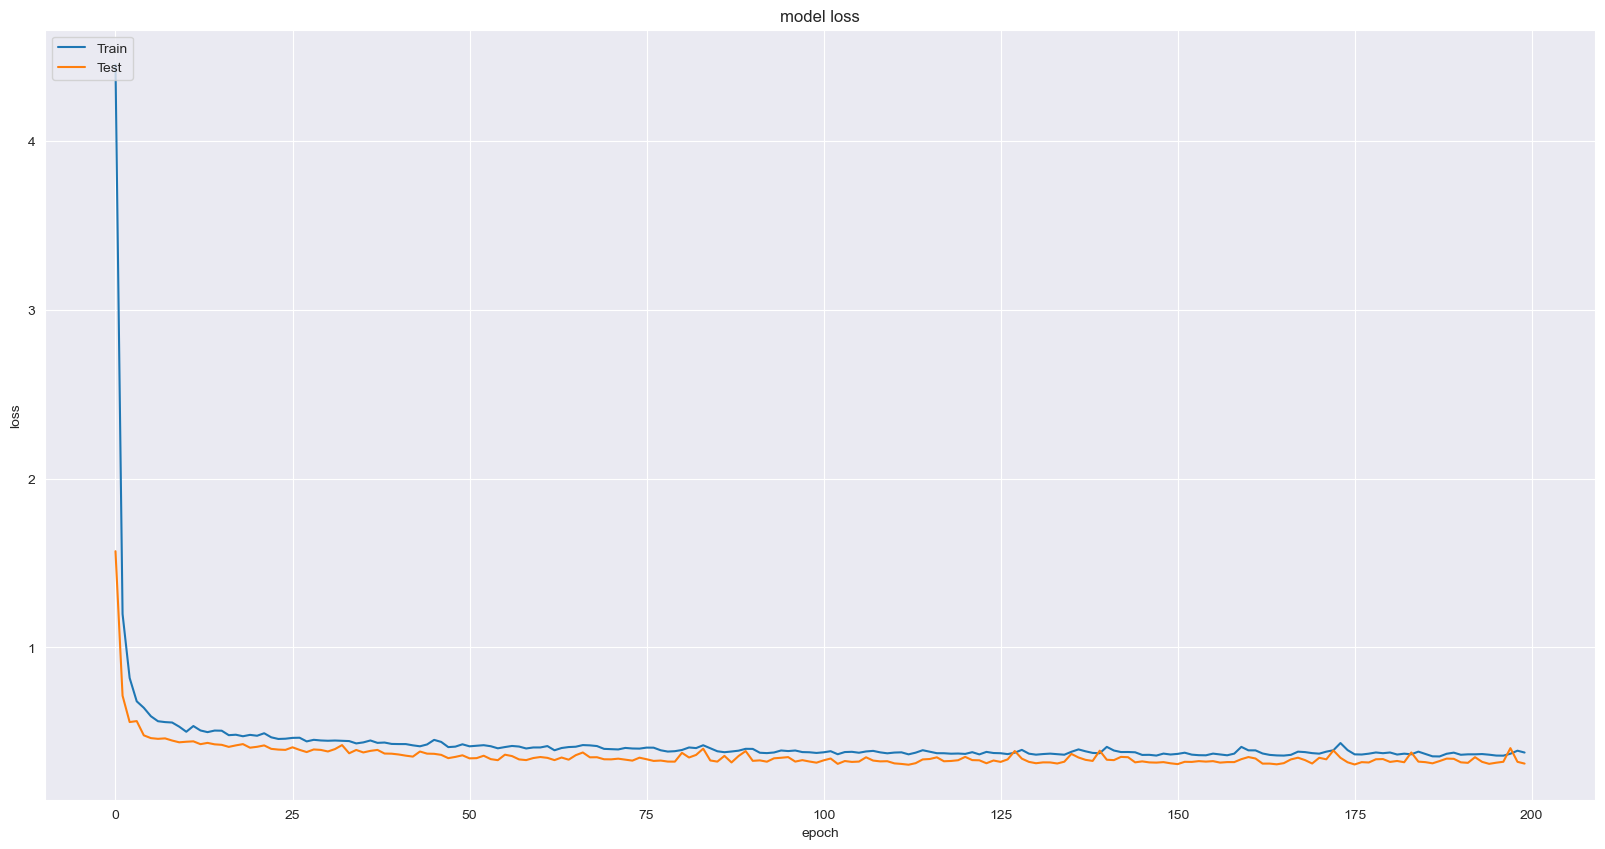

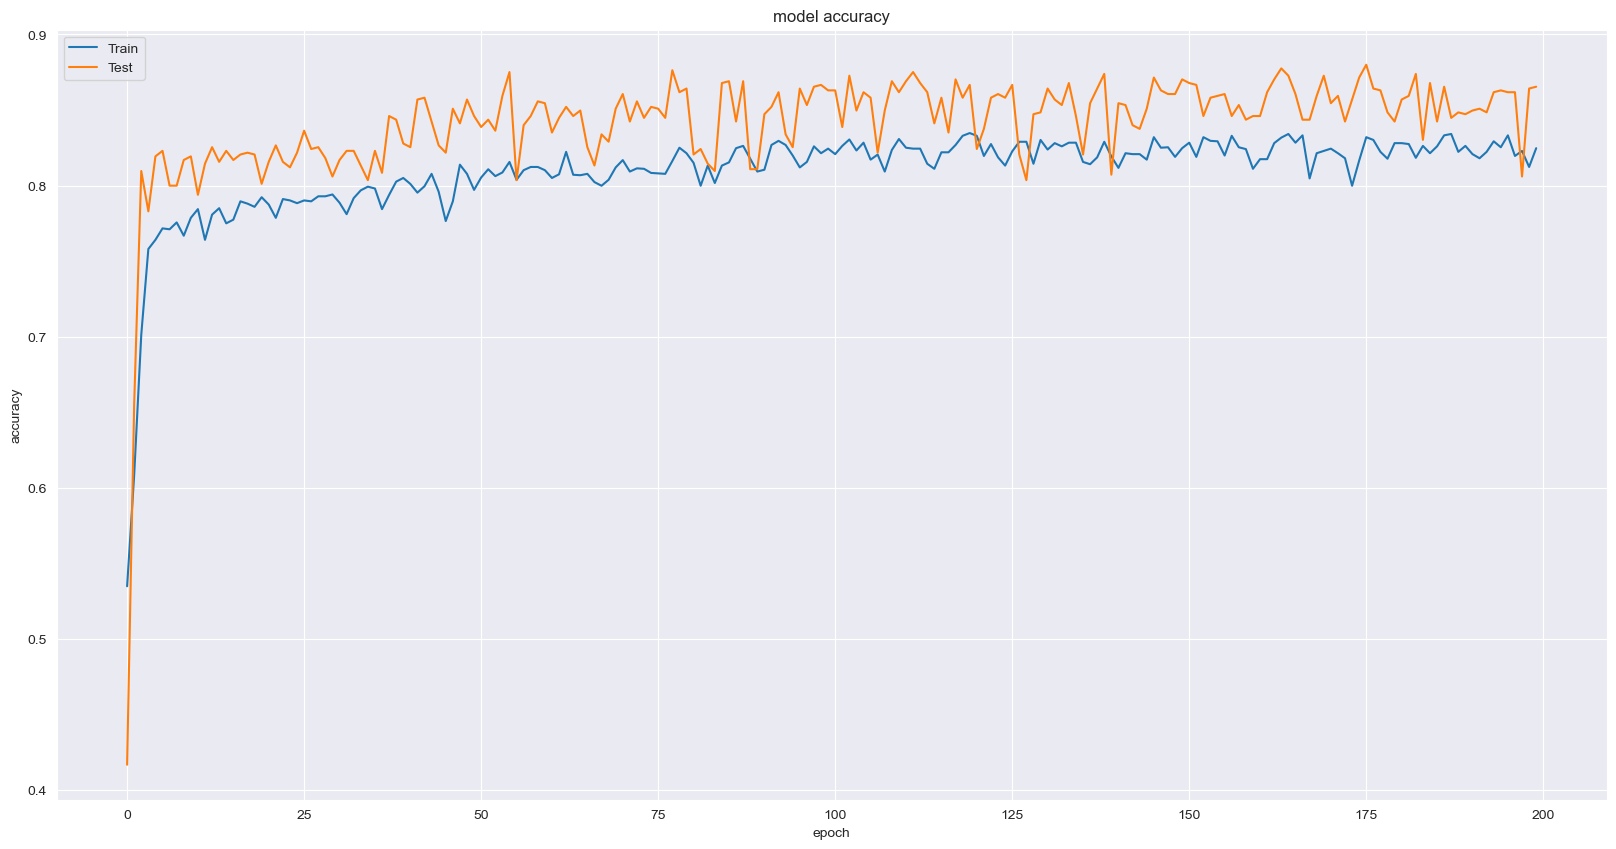

In [176]:
def my_plot(history):
    plt.figure(figsize=(20, 10))
    # plt.style.use("seaborn-paper")
    # summarize history for loss
    plt.plot(np.arange(len(history['training_loss'])),history['training_loss'])
    plt.plot(np.arange(len(history['training_loss'])),history['test_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
     # summarize history for accuracy
    plt.figure(figsize=(20, 10))
    plt.plot(np.arange(len(history['training_loss'])),history['training_acc'])
    plt.plot(np.arange(len(history['training_loss'])),history['test_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

my_plot(history)